<a href="https://colab.research.google.com/github/yesyell/DA_School_1/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/%EA%B5%B0%EC%A7%91%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [K-Means 알고리즘](https://paullabworkspace.notion.site/K-Means-PCA-41bb650a438444aab539e65e4539556b)

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
# 정형데이터 - 붓꽃 데이터 품종 분류
iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns=['sepal_length', 'sepal_width',
                                                  'petal_length', 'petal_width'])

- n_cluster로 군집화 개수를 지정해줍니다.
- max_iter는 최대반복 횟수입니다.
    - `max_iter=300` 300회이상 군집 중심점이 이동이 없을 시에는 모델 생성을 끝낸다는 의미
- kmeans.labels_로 각 행의 데이터들이 어느 군집단에 속해있는지 확인합니다.

In [4]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(iris_df)

print(kmeans.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
iris_df['target'] = iris.target
iris_df['cluster'] = kmeans.labels_
iris_result = iris_df.groupby(['target','cluster'])['sepal_length'].count()

print(iris_result)

target  cluster
0       1          50
1       0          50
2       0           1
        2          49
Name: sepal_length, dtype: int64


In [6]:
marker0_index = iris_df[iris_df['cluster']==0].index
marker1_index = iris_df[iris_df['cluster']==1].index
marker2_index = iris_df[iris_df['cluster']==2].index

In [7]:
marker0_index

Int64Index([ 50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
             63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
             76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
             89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 106],
           dtype='int64')

## PCA

In [6]:
# iris data 데이터 역시 3개의 군집으로 target 이 있기 때문에 2차원으로 시각화
pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(iris.data)

iris_df['pca_x'] = pca_transformed[:,0]
iris_df['pca_y'] = pca_transformed[:,1]

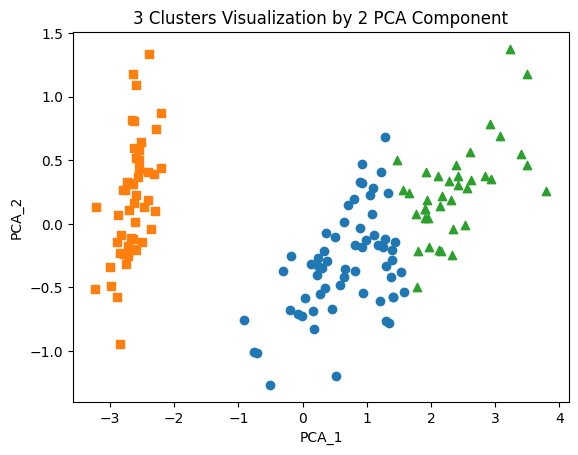

In [7]:
plt.scatter(x=iris_df.loc[marker0_index, 'pca_x'],
            y=iris_df.loc[marker0_index,'pca_y'], marker = 'o')
plt.scatter(x=iris_df.loc[marker1_index, 'pca_x'],
            y=iris_df.loc[marker1_index,'pca_y'], marker = 's')
plt.scatter(x=iris_df.loc[marker2_index, 'pca_x'],
            y=iris_df.loc[marker2_index,'pca_y'], marker = '^')

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.title('3 Clusters Visualization by 2 PCA Component')
plt.savefig('cluster')
plt.show()

In [8]:
# n_samples = 데이터의 개수
# n_features = 열의 개수
# centers = 군집의 개수, 생성될 군집의 표준편차
X, y = make_blobs(n_samples=200, n_features=2,centers=3,cluster_std=0.8,random_state=0)
print(X.shape, y.shape)

unique, counts = np.unique(y, return_counts = True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [9]:
cluster_df = pd.DataFrame(data = X, columns = ['feature_1','feature_2'])
cluster_df['target'] = y
cluster_df

,feature_1,feature_2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0
...,...,...,...
195,2.956576,0.033718,1
196,-2.074113,4.245523,2
197,2.783411,1.151438,1
198,1.226724,3.620511,0


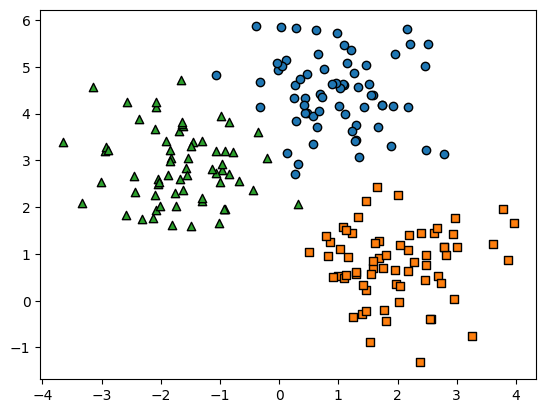

In [10]:
target_list = np.unique(y)
markers = ['o','s','^','P','D','H','x']

for target in target_list:
    cluster = cluster_df[cluster_df['target']==target]
    plt.scatter(x=cluster['feature_1'],y=cluster['feature_2'], edgecolor='k', marker=markers[target])

plt.show()

In [11]:
kmeans = KMeans(n_clusters = 3, init='k-means++', max_iter = 200, random_state = 0)
cluster_labels = kmeans.fit_predict(X)
cluster_df['kmeans_label'] = cluster_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


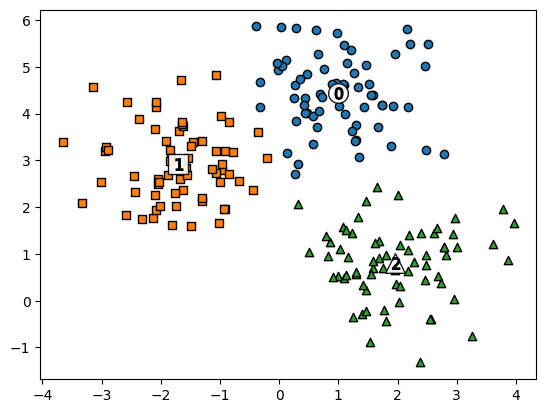

In [12]:
#cluster_centers는 각 군집의 중심 좌표를 말해줌
centers = kmeans.cluster_centers_

# cluster_centers_ 를 통해서 군집 중심점의 좌표를 확인할 수 있습니다. (x,y)좌표

unique_labels = np.unique(cluster_labels)

for label in unique_labels:
    label_cluster = cluster_df[cluster_df['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['feature_1'],y = label_cluster['feature_2'],
                edgecolor = 'k', marker = markers[label])

    #군집별 중심 위치 좌표 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color = 'white',
               alpha = 0.9, edgecolor = 'k', marker = markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color = 'k',
                edgecolor = 'k', marker='$%d$' % label)